In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import seaborn as sns

%matplotlib inline

seed = 0

In [2]:
df = pd.read_csv('dataset/winequality-red.csv')
col_names = df.columns
df.head()

,FIXED_ACIDITY,VOLATILE_ACIDITY,CITRIC_ACID,RESIDUAL_SUGAR,CHLORIDES,FREE_SULFUR_DIOXIDE,TOTAL_SULFUR_DIOXIDE,DENSITY,pH,SULPHATES,ALCOHOL,QUALITY
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
if not os.path.isdir('plots'):
    os.mkdir('plots')

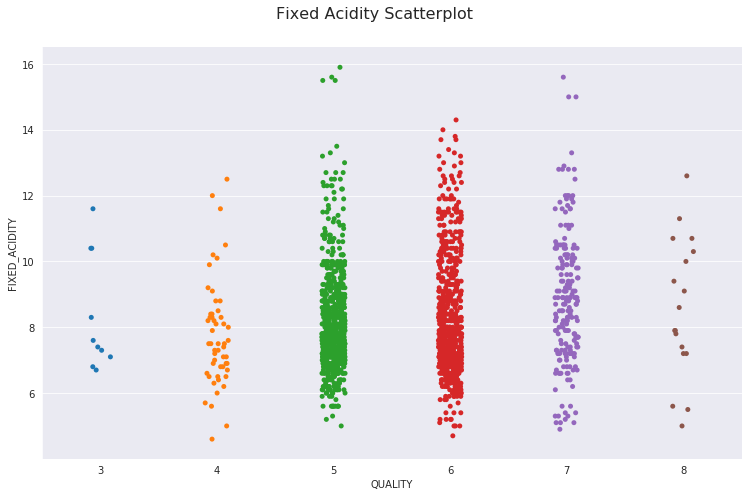

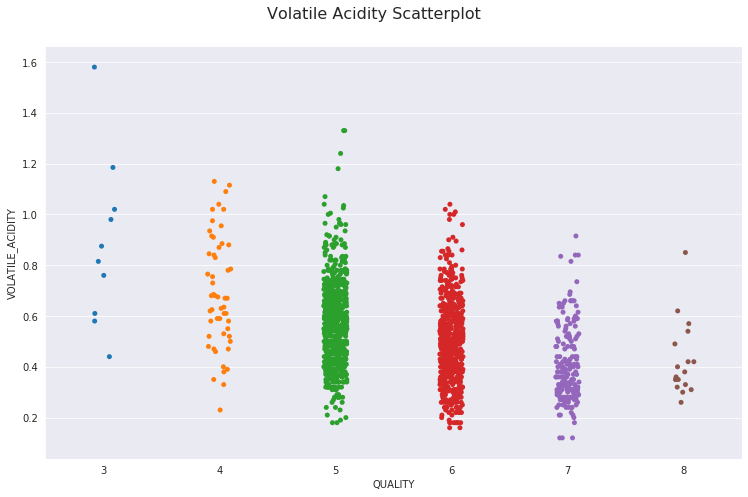

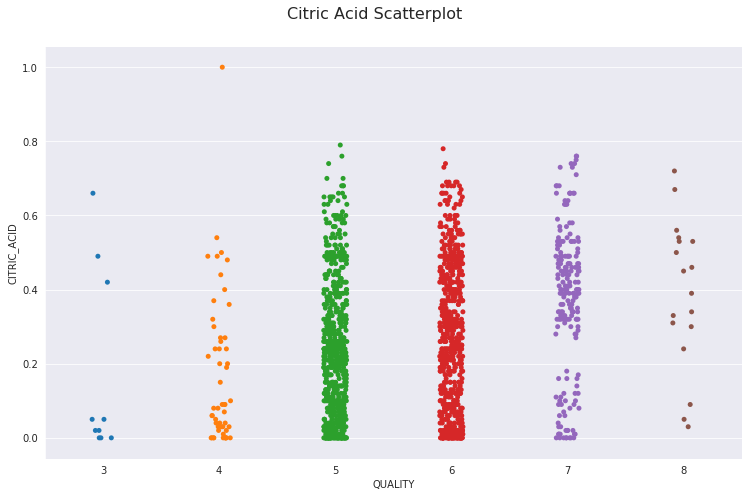

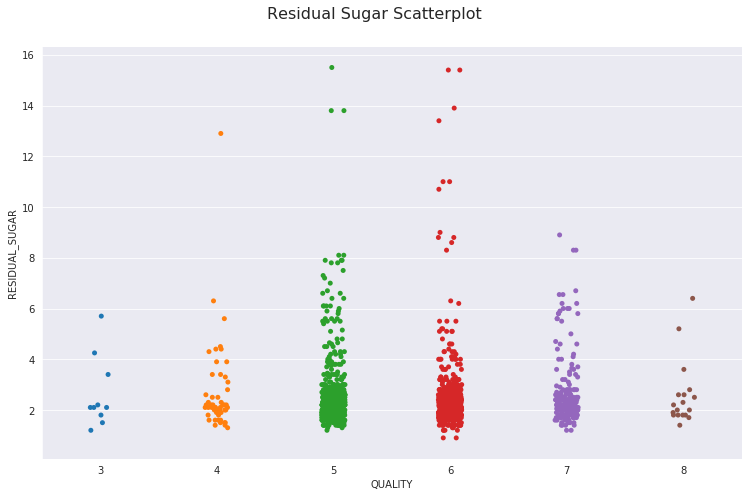

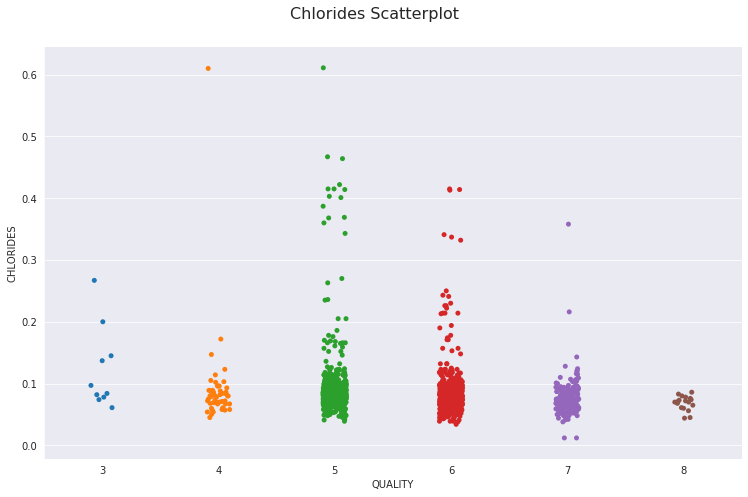

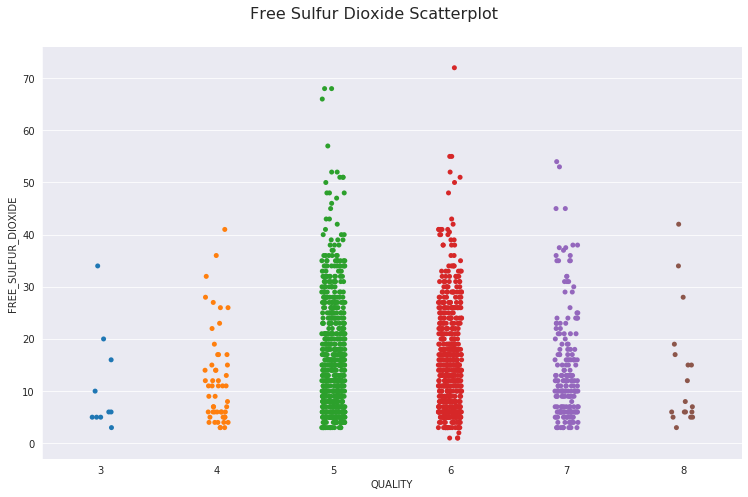

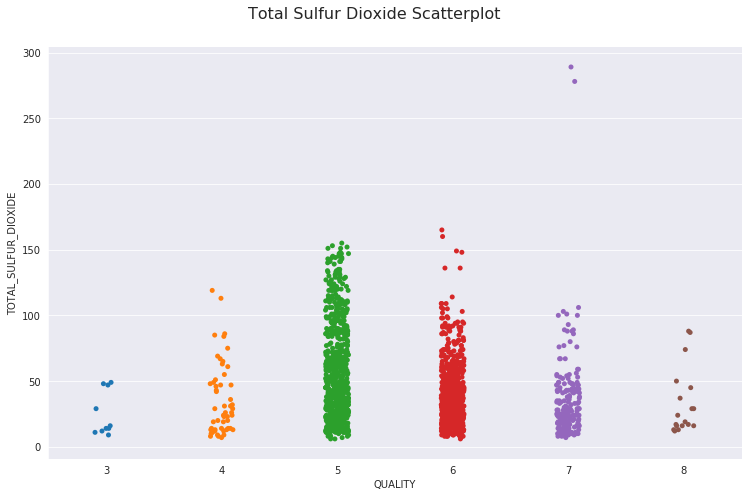

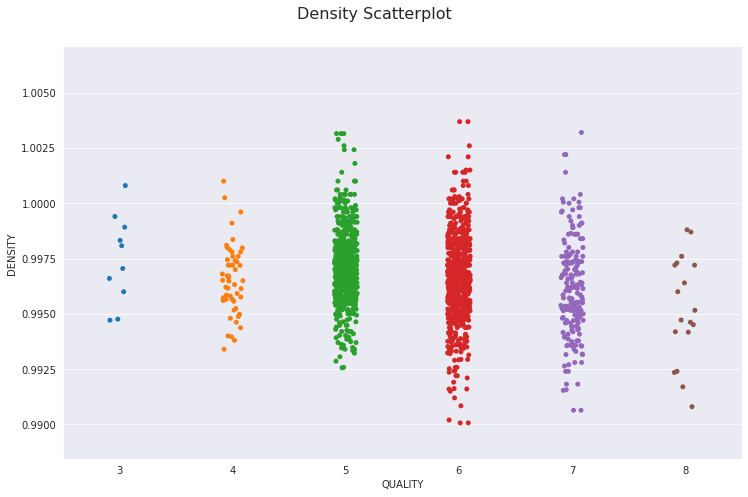

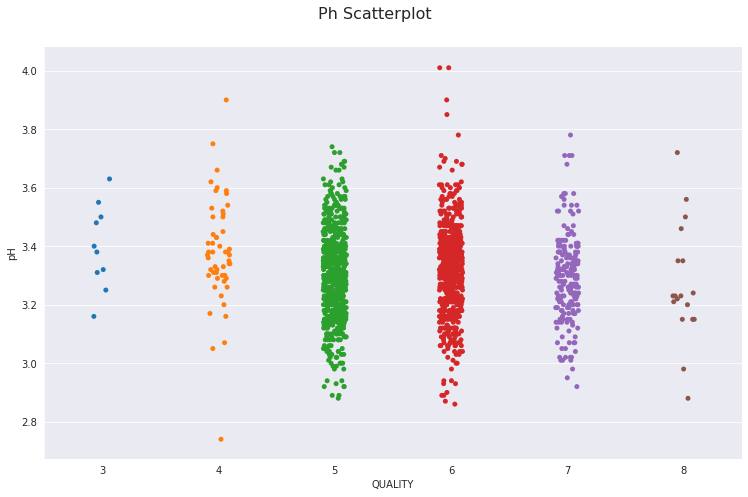

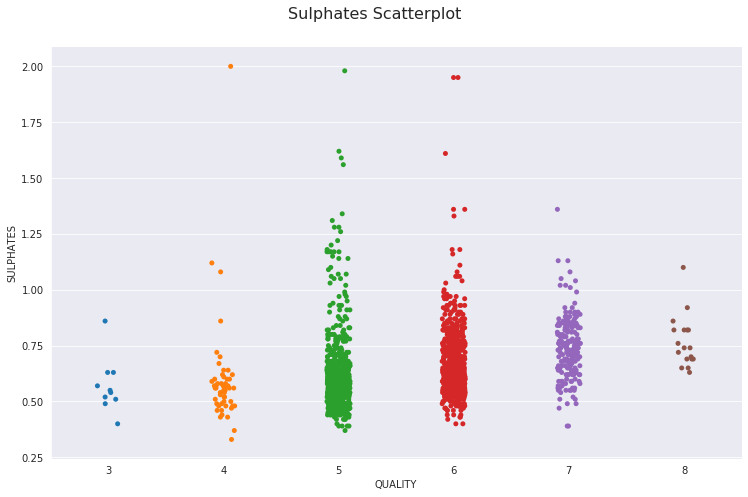

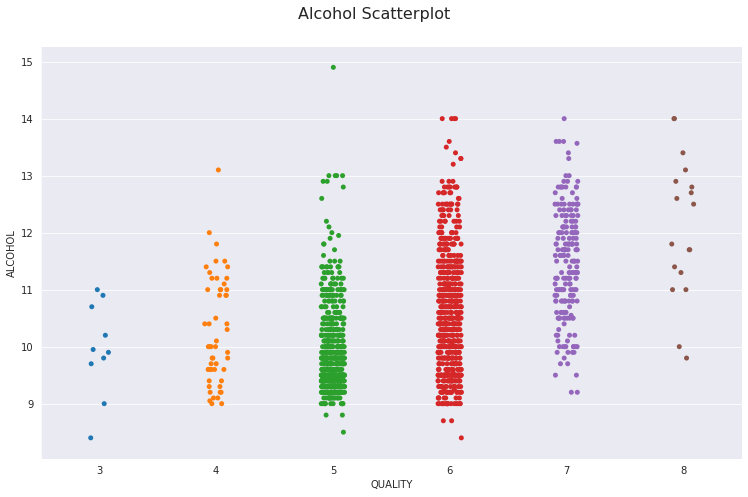

In [4]:
def make_scatterplot(x, y, df):
    
    folder_dir = 'plots/scatter_plot/'
    file_dir = os.path.join(os.path.abspath(''), folder_dir)
    
    if not os.path.isdir(folder_dir):
        os.mkdir(folder_dir)

    col_names = df.columns
    
    sns.set_style('darkgrid')
    img = sns.catplot(x = col_names[x], y = col_names[y], data = df, height = 7, aspect = 1.5)
    plt.subplots_adjust(top = 0.9)
    img.fig.suptitle("{} Scatterplot".format(col_names[y].title().replace("_", " ")), fontsize = 16)
    
    img_name = '{}_scatterplot'.format(col_names[y].lower())
    img.fig.savefig(os.path.join(file_dir, img_name), bbox_inches = 'tight')
    
for i in range(len(col_names) - 1):
    make_scatterplot(11, i, df)

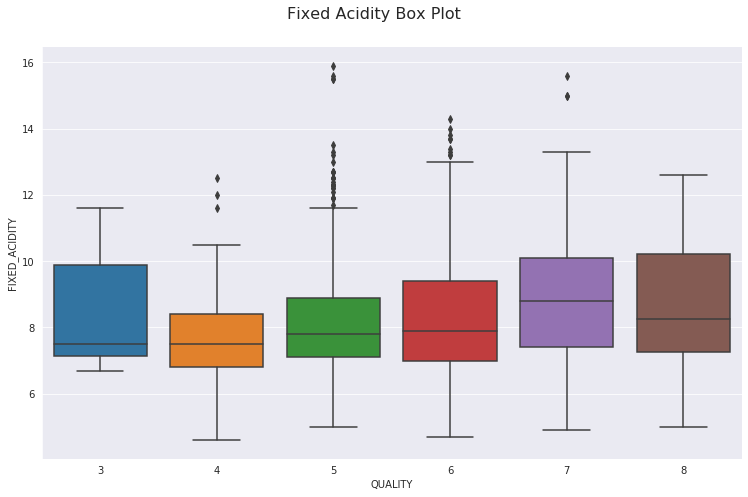

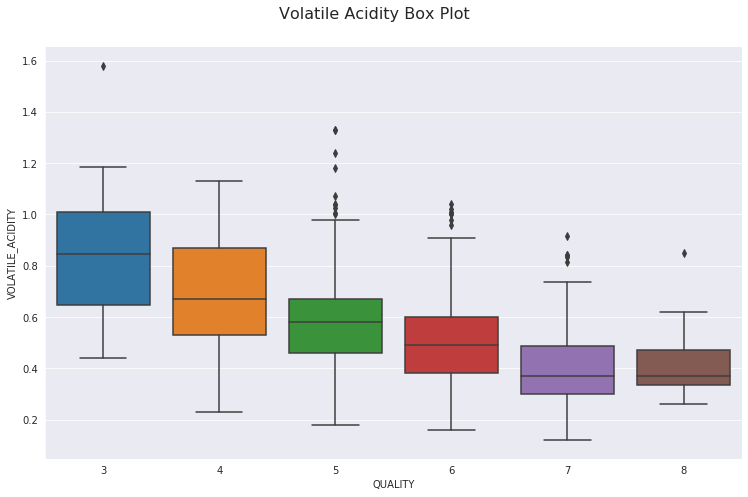

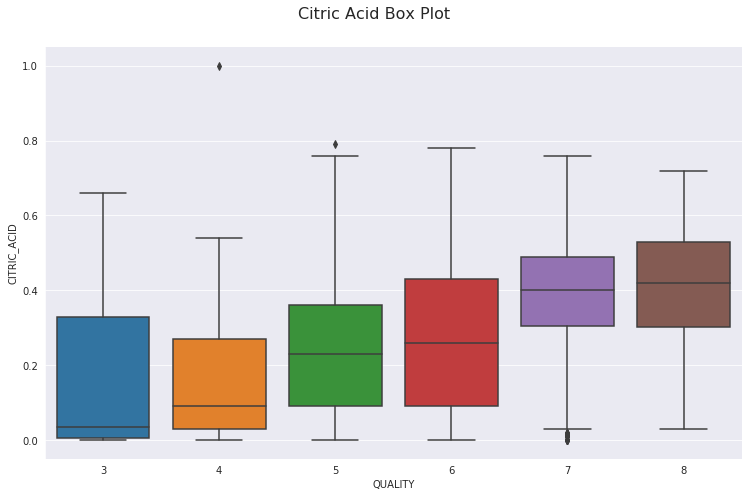

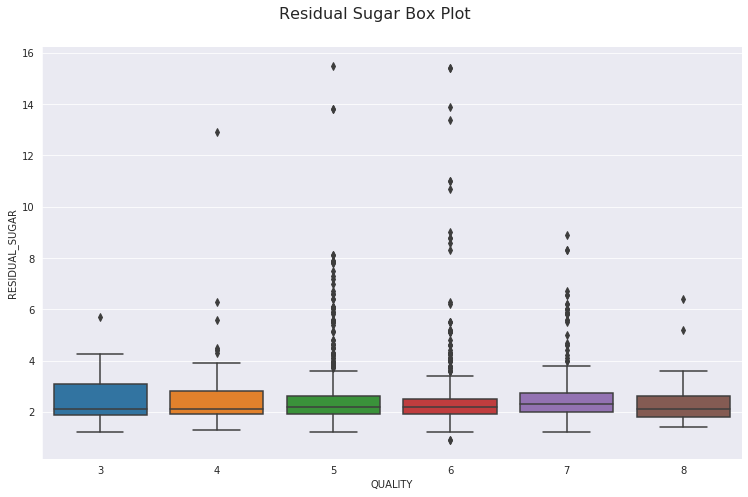

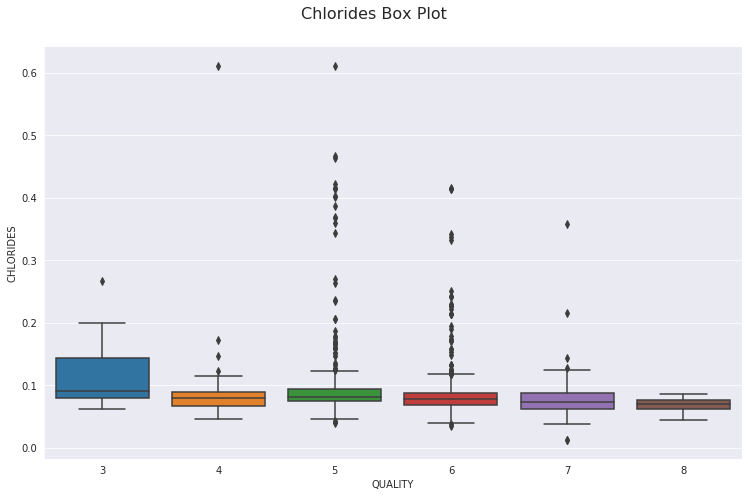

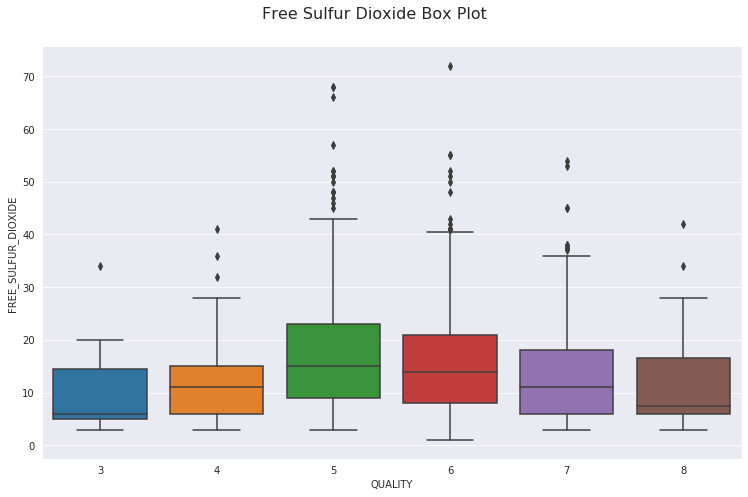

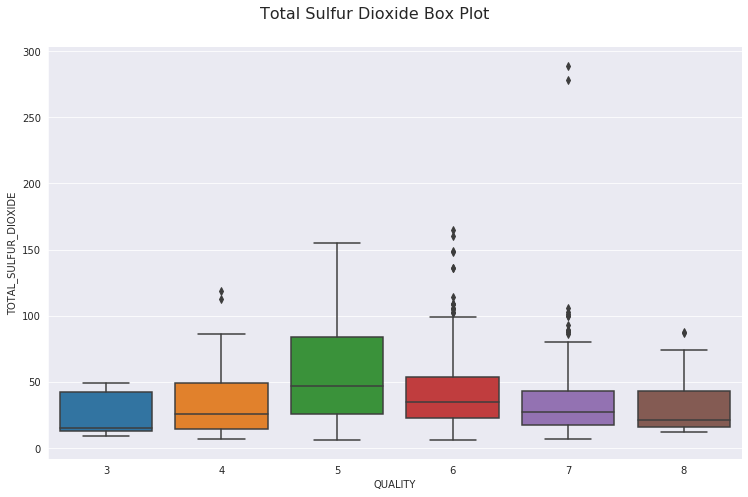

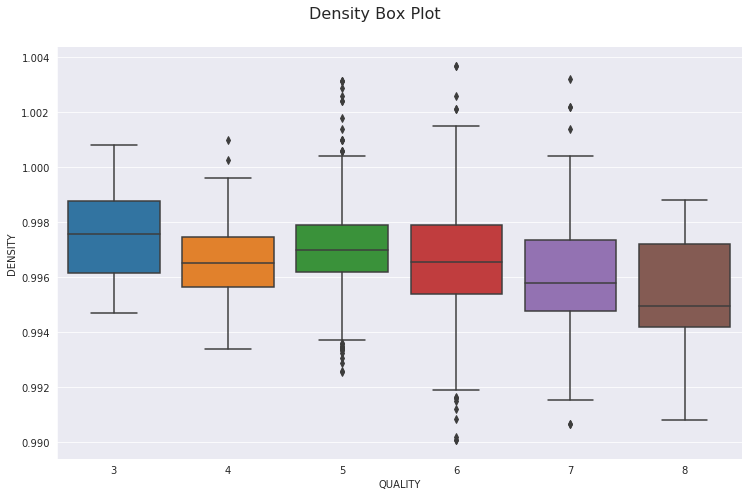

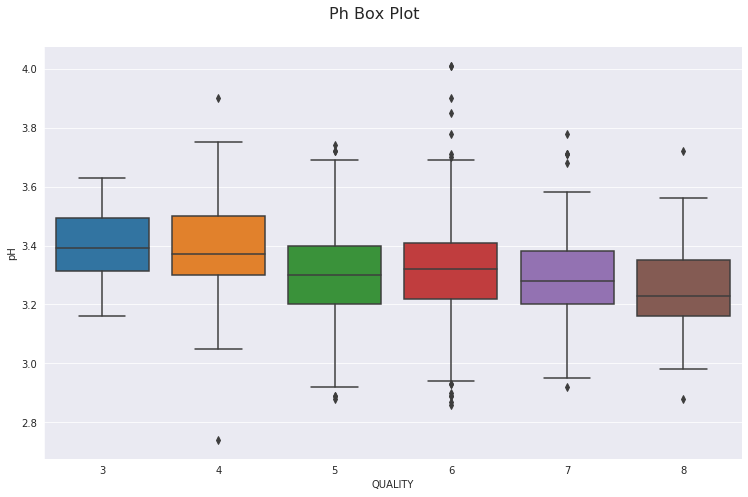

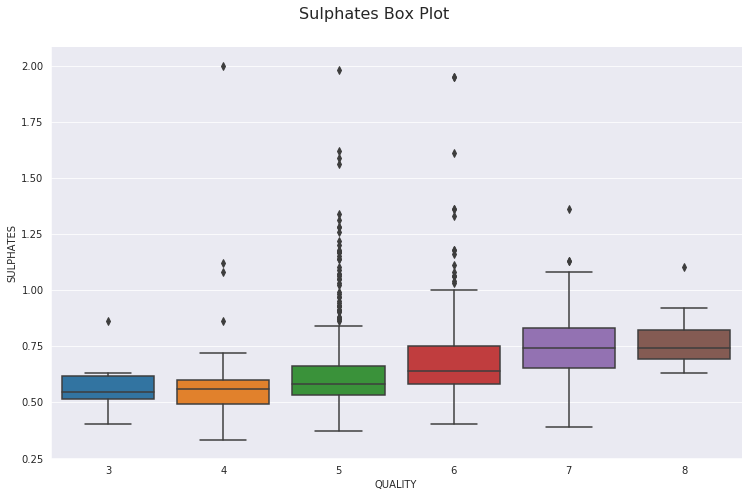

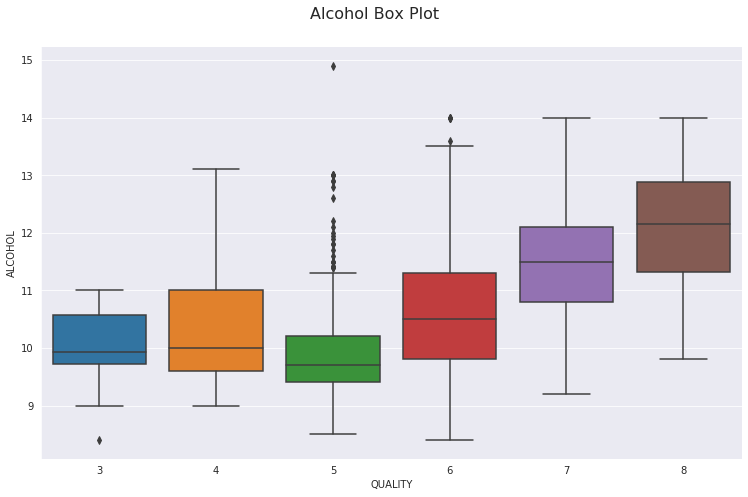

In [5]:
def make_boxplot(x, y, df):
    
    folder_dir = 'plots/box_plot/'
    file_dir = os.path.join(os.path.abspath(''), folder_dir)
    
    if not os.path.isdir(folder_dir):
        os.mkdir(folder_dir)

    col_names = df.columns
    
    sns.set_style('darkgrid')
    img = sns.catplot(x = col_names[x], y = col_names[y], data = df, height = 7, aspect = 1.5, kind = "box")
    plt.subplots_adjust(top = 0.9)
    img.fig.suptitle("{} Box Plot".format(col_names[y].title().replace("_", " ")), fontsize = 16)
    
    img_name = '{}_boxplot'.format(col_names[y].lower())
    img.fig.savefig(os.path.join(file_dir, img_name), bbox_inches = 'tight')
    
for i in range(len(col_names) - 1):
    make_boxplot(11, i, df)

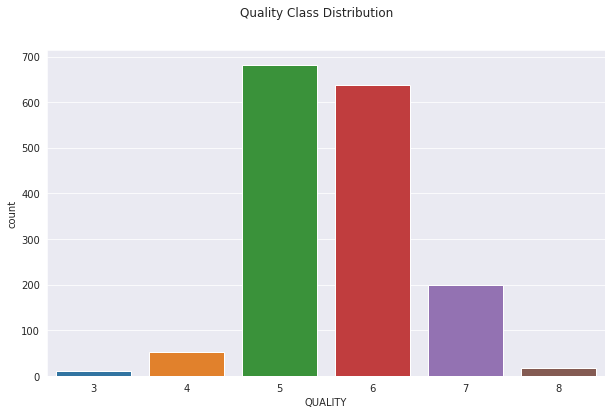

In [6]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (10, 6))
sns.countplot(x = 'QUALITY', data = df, ax = ax)
fig.suptitle('Quality Class Distribution')

folder_dir = 'plots/'
file_dir = os.path.join(os.path.abspath(''), folder_dir)
img_name = 'quality_count'
fig.savefig(os.path.join(file_dir, img_name), bbox_inches = 'tight')

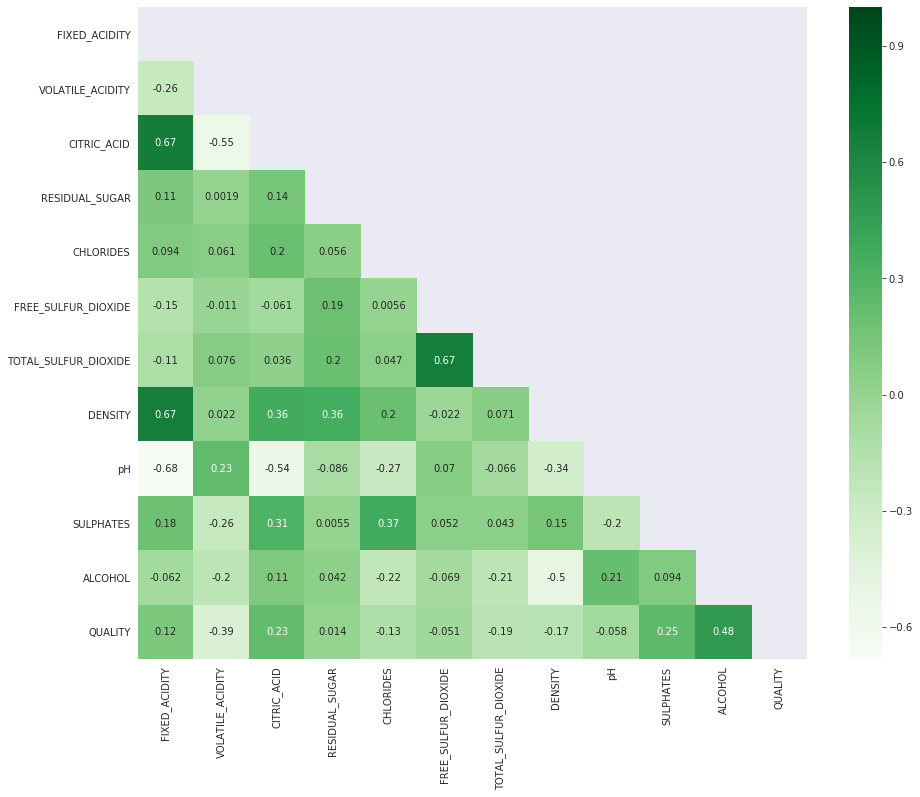

In [7]:
# https://www.surveygizmo.com/resources/blog/variance-covariance-correlation/

correlation = df.corr()

# Default value: False
mask = np.zeros_like(correlation, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (15, 12))
sns.heatmap(correlation, mask = mask, annot = True, cmap= "Greens")

folder_dir = 'plots/'
file_dir = os.path.join(os.path.abspath(''), folder_dir)
img_name = 'correlation.png'
fig.savefig(os.path.join(file_dir, img_name), bbox_inches = 'tight')

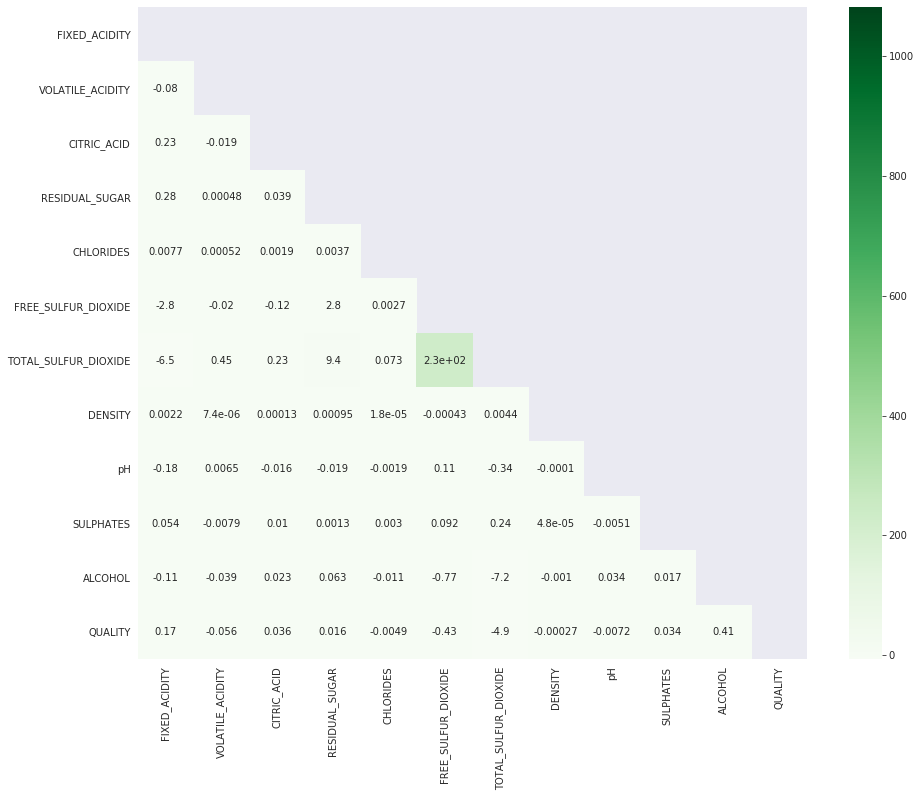

In [8]:
# https://www.surveygizmo.com/resources/blog/variance-covariance-correlation/

covariance = df.cov()

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (15, 12))
sns.heatmap(covariance, mask = mask, annot = True, cmap= "Greens")

folder_dir = 'plots/'
file_dir = os.path.join(os.path.abspath(''), folder_dir)
img_name = 'covariance.png'
fig.savefig(os.path.join(file_dir, img_name), bbox_inches = 'tight')

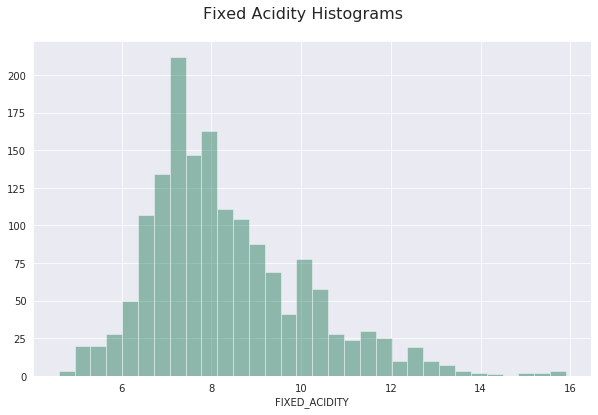

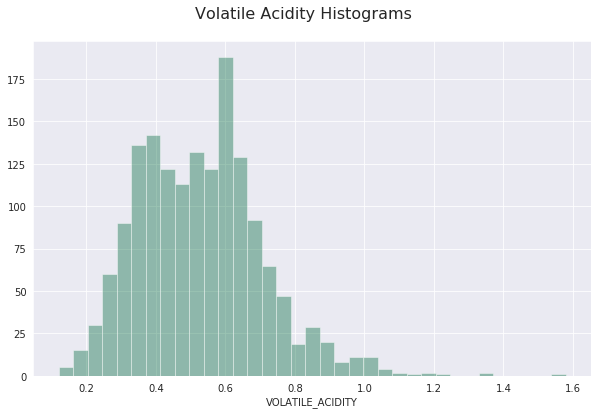

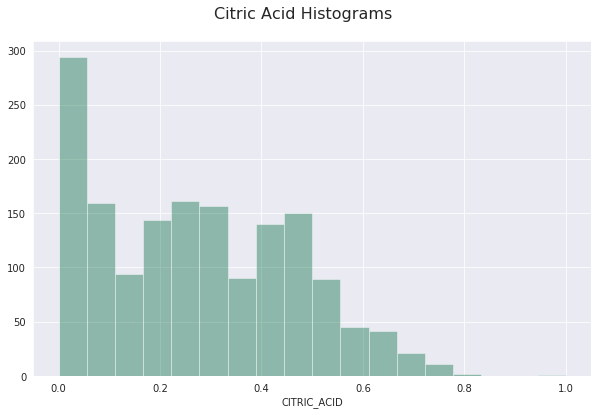

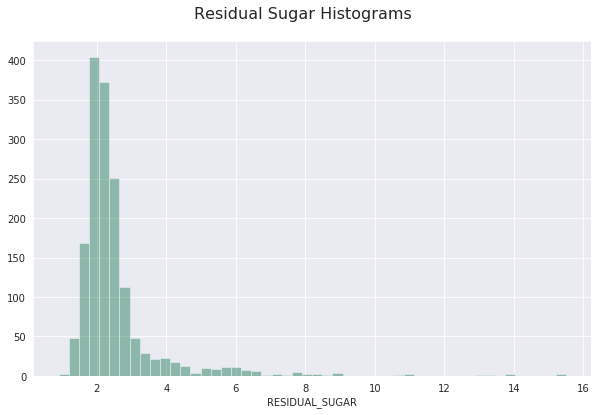

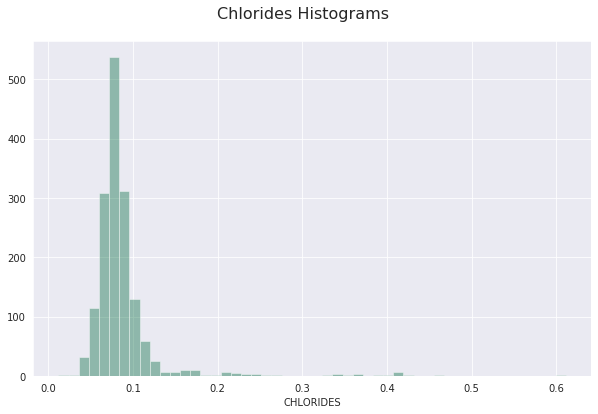

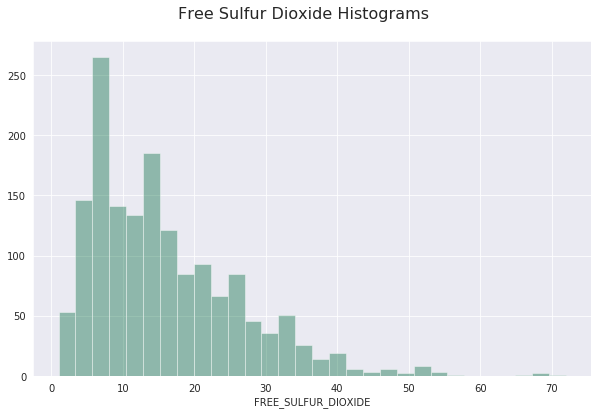

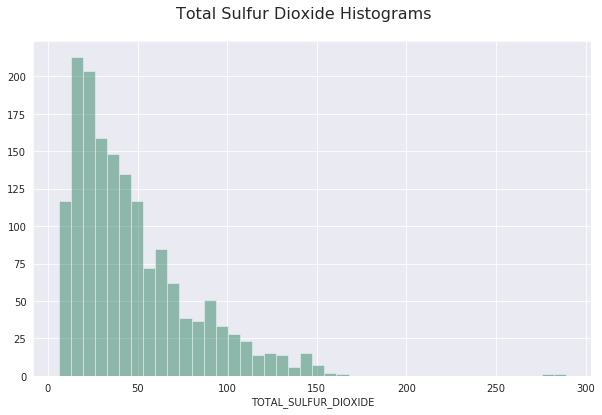

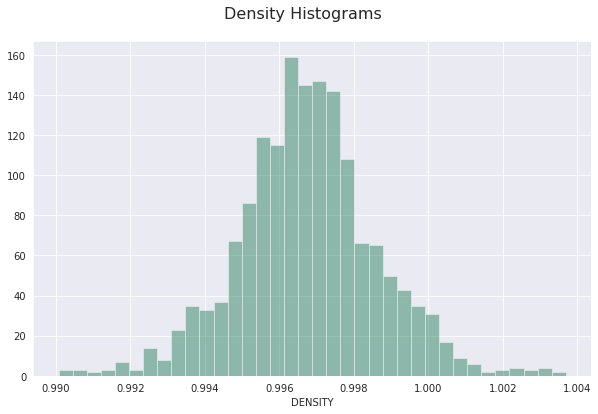

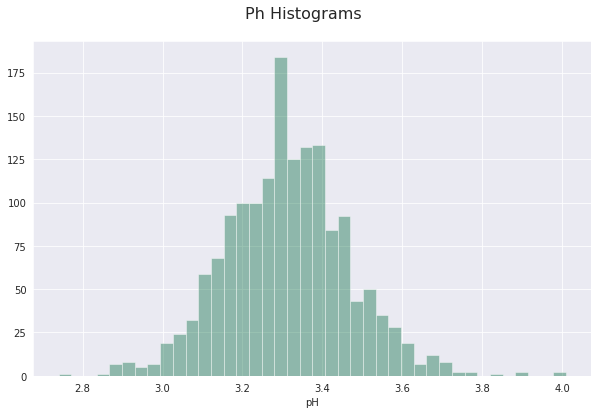

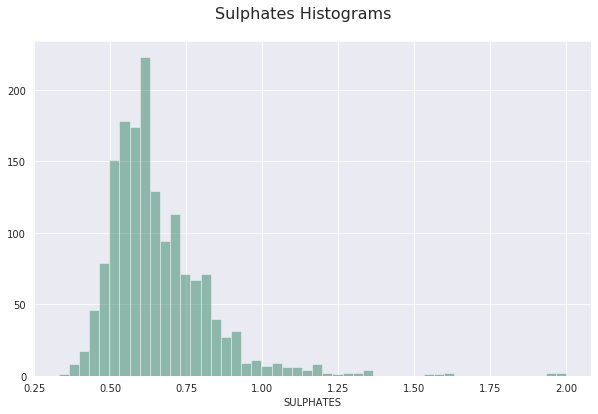

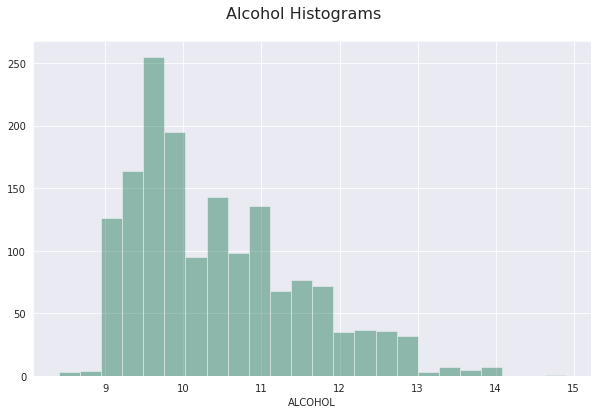

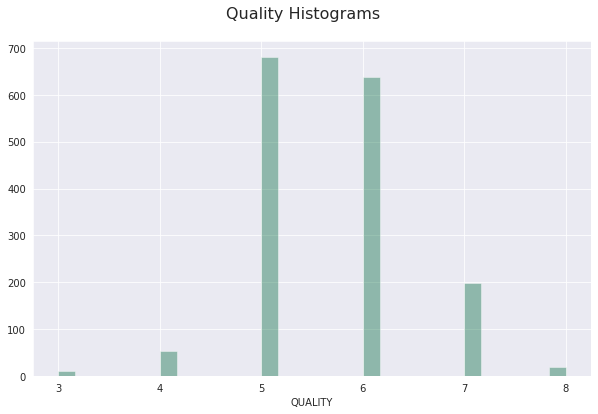

In [9]:
for label in col_names:
    fig, ax = plt.subplots(figsize = (10, 6))
    fig.subplots_adjust(top = 0.9)
    fig.suptitle("{} Histograms".format(label.title().replace("_", " ")), fontsize = 16)
    sns.distplot(a = df[label], ax = ax, hist = True, kde = False, color = '#066C42')
    
    folder_dir = 'plots/histograms'
    file_dir = os.path.join(os.path.abspath(''), folder_dir)
    if not os.path.isdir(folder_dir):
        os.mkdir(folder_dir)
        
    img_name = '{}_hist.png'.format(label.title())
    fig.savefig(os.path.join(file_dir, img_name), bbox_inches = 'tight')

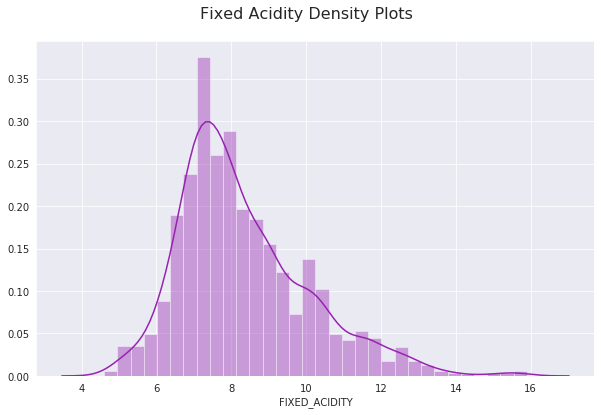

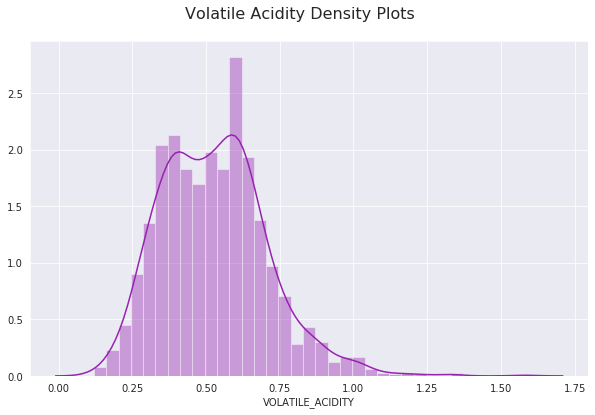

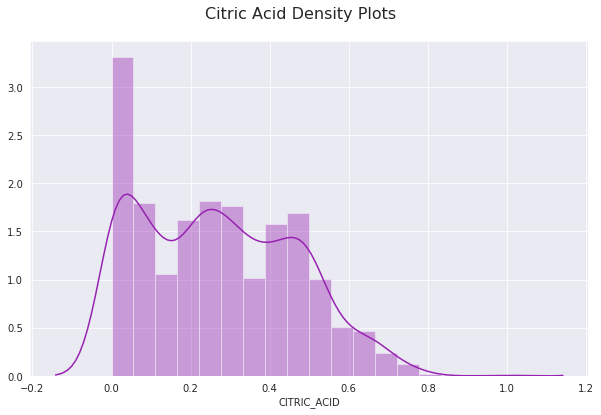

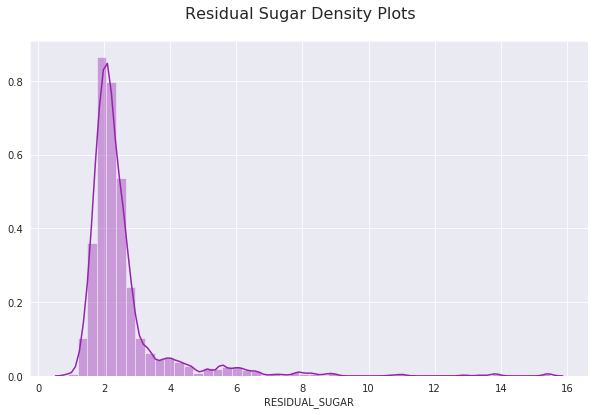

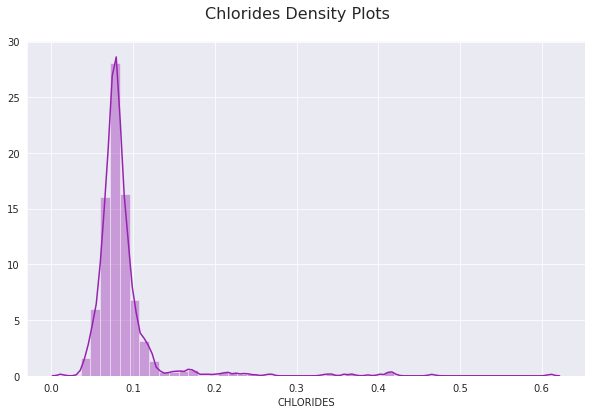

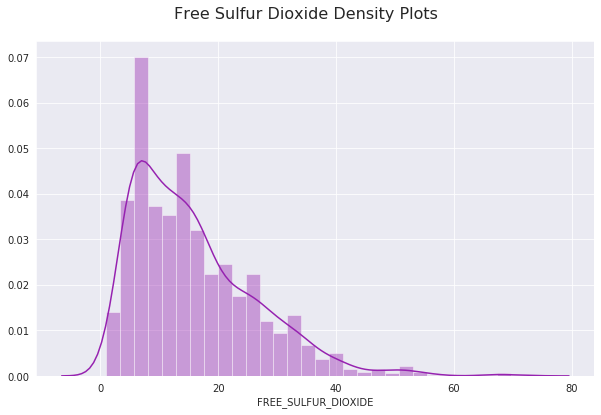

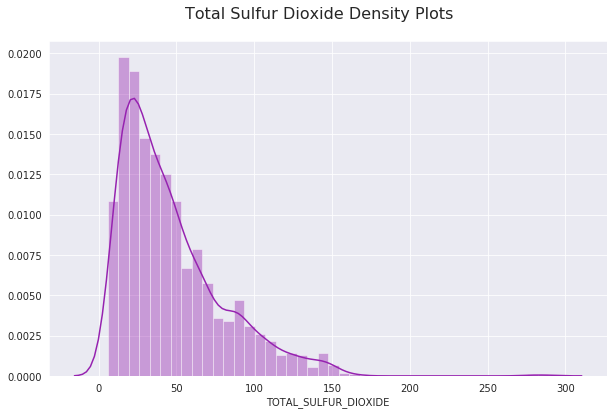

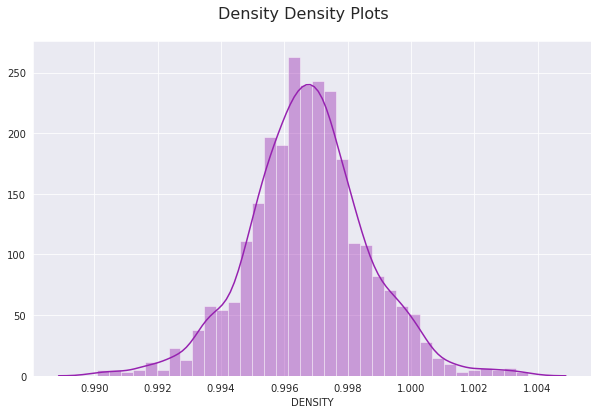

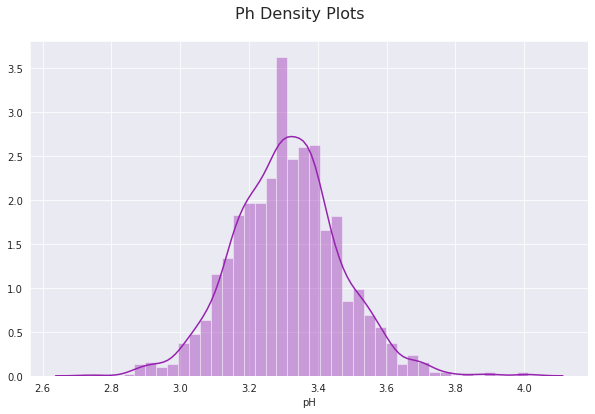

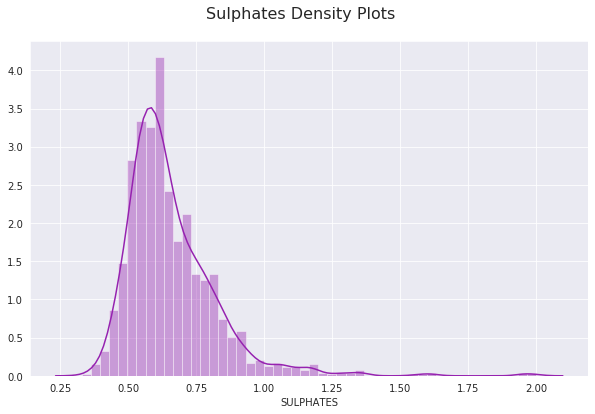

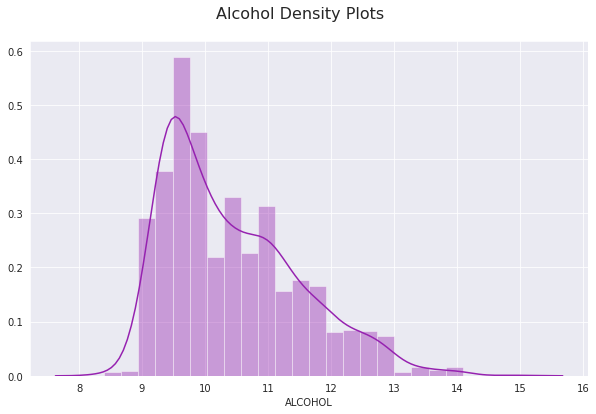

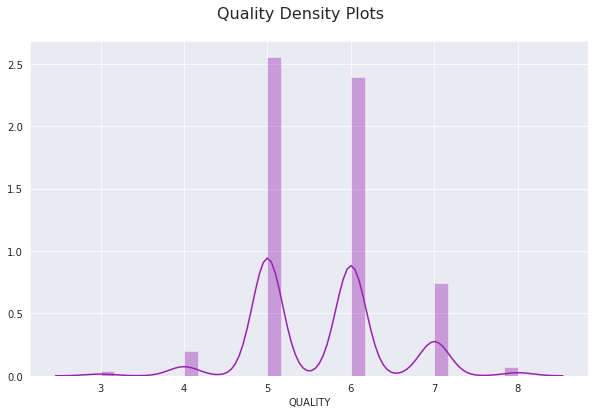

In [10]:
for label in col_names:
    fig, ax = plt.subplots(figsize = (10, 6))
    fig.subplots_adjust(top = 0.9)
    fig.suptitle("{} Density Plots".format(label.title().replace("_", " ")), fontsize = 16)
    sns.distplot(a = df[label], ax = ax, hist = True, kde = True, color = '#9622B0')
    
    folder_dir = 'plots/density_plots'
    file_dir = os.path.join(os.path.abspath(''), folder_dir)
    if not os.path.isdir(folder_dir):
        os.mkdir(folder_dir)
    img_name = '{}_density.png'.format(label.title())
    fig.savefig(os.path.join(file_dir, img_name), bbox_inches = 'tight')

In [11]:
col_names

Index(['FIXED_ACIDITY', 'VOLATILE_ACIDITY', 'CITRIC_ACID', 'RESIDUAL_SUGAR',
       'CHLORIDES', 'FREE_SULFUR_DIOXIDE', 'TOTAL_SULFUR_DIOXIDE', 'DENSITY',
       'pH', 'SULPHATES', 'ALCOHOL', 'QUALITY'],
      dtype='object')

In [12]:
df.head()

,FIXED_ACIDITY,VOLATILE_ACIDITY,CITRIC_ACID,RESIDUAL_SUGAR,CHLORIDES,FREE_SULFUR_DIOXIDE,TOTAL_SULFUR_DIOXIDE,DENSITY,pH,SULPHATES,ALCOHOL,QUALITY
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


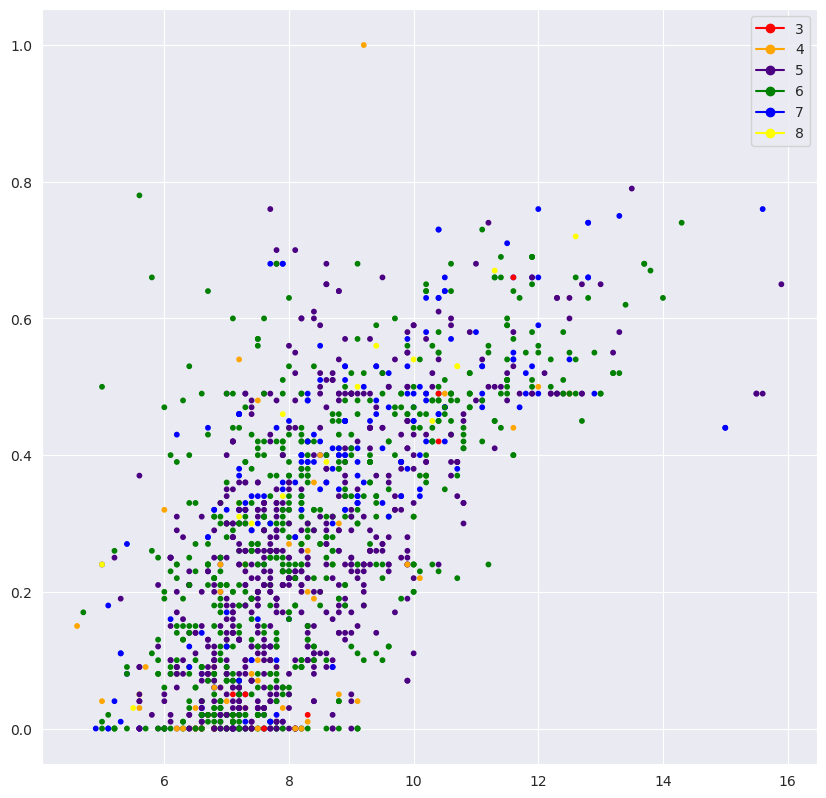

In [13]:
colors = {3: 'red', 4: 'orange', 5: 'indigo', 6: 'green', 7: 'blue', 8: 'yellow'}
handles = [lines.Line2D([0], [0], color = value, marker = 'o', label = key) for key, value in colors. items()]    

fig, ax = plt.subplots(figsize = (10, 10), dpi = 100)
ax.scatter(x = df['FIXED_ACIDITY'], y = df['CITRIC_ACID'], color = df['QUALITY'].apply(lambda x: colors[x]), s = 10)
ax.legend(handles = handles)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FIXED_ACIDITY,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
VOLATILE_ACIDITY,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
CITRIC_ACID,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
RESIDUAL_SUGAR,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
CHLORIDES,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
FREE_SULFUR_DIOXIDE,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
TOTAL_SULFUR_DIOXIDE,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
DENSITY,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
SULPHATES,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [15]:
np.arange(4.5, 16, 0.5)

array([ 4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5,
       10. , 10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. ,
       15.5])